In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
def get_dataframes():
    dataframes = []
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            path = os.path.join(dirname, filename)
            print(path)
            dataframes.append(pd.read_csv(path))
    return dataframes


df = get_dataframes()[0]
df

/kaggle/input/mba-admission-dataset/MBA.csv


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [4]:
df = df.drop(columns=['application_id'])
# df['admission'] = df['admission'].replace({'Admit': 0, 'Waitlist': 1})
# df['admission'] = df['admission'].fillna(2)


df = df[df['admission'] != 'Waitlist']
df['admission'] = df['admission'].replace({'Admit': 0})
df['admission'] = df['admission'].fillna(1)


df['admission'] = df['admission'].astype(int)
# df = df.dropna()
# df.drop(columns=['application_id'], inplace=True)
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,0
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,1
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,0
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,1
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,1
...,...,...,...,...,...,...,...,...,...
6189,Male,False,3.49,Business,White,640.0,5.0,Other,1
6190,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,1
6191,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,0
6192,Male,True,3.36,Business,NaN,590.0,5.0,Other,1


In [5]:
df['race'] = df['race'].fillna('Other')
df_na = df[df.isna().any(axis=1)]
df_na
df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,0
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,1
2,Female,True,3.30,Business,Other,710.0,5.0,Technology,0
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,1
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,1
...,...,...,...,...,...,...,...,...,...
6189,Male,False,3.49,Business,White,640.0,5.0,Other,1
6190,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,1
6191,Female,True,3.22,Business,Other,680.0,5.0,Health Care,0
6192,Male,True,3.36,Business,Other,590.0,5.0,Other,1


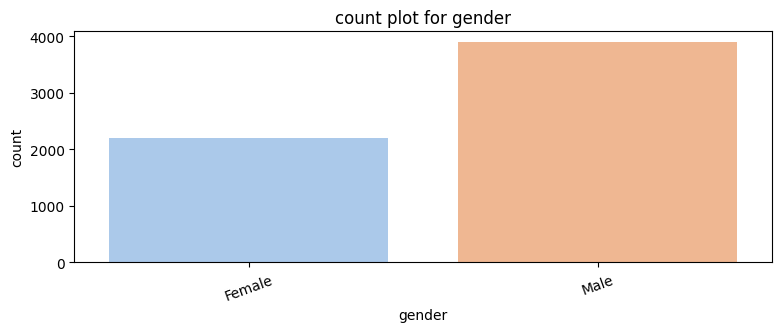

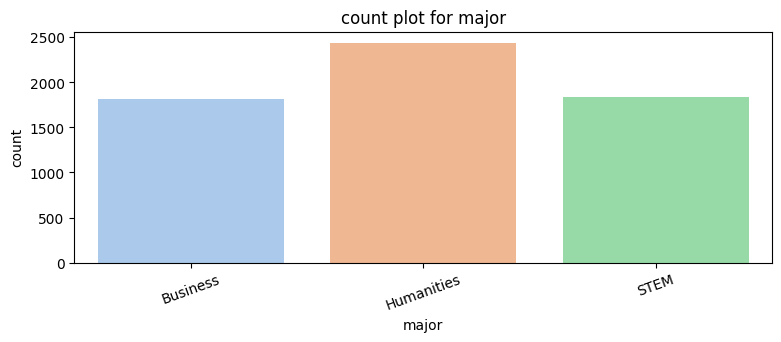

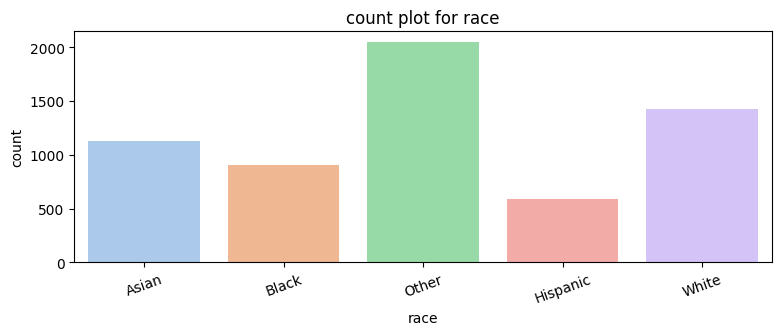

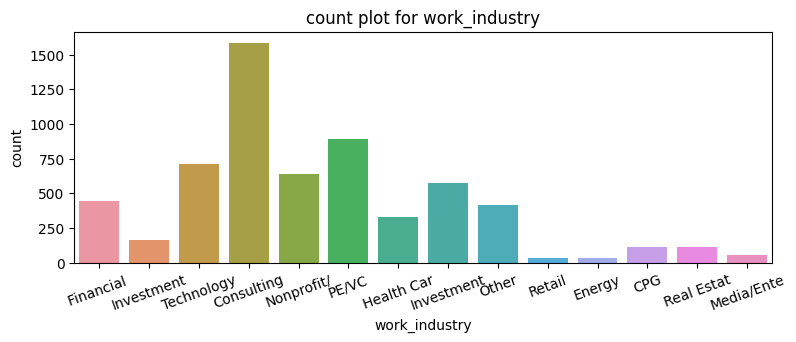

In [6]:
sns.set_palette("pastel")

for cols in df.select_dtypes('object').columns:
    plt.figure(figsize=(9,3))
    sns.countplot(data=df, x=cols )
    plt.title(f"count plot for {cols}")
    plt.xticks(rotation=20)
    new_labels = [label if len(label) <= 10 else label[:10] for label in df[cols].unique()]
    plt.gca().set_xticklabels(new_labels)
    plt.show()

In [7]:
def make_categorial_statistics(df):
    non_numeric_columns = df.select_dtypes(exclude=['int', 'float'])
    unique_counts = non_numeric_columns.nunique()
    
    unique_counts_df = pd.DataFrame(unique_counts).reset_index()
    unique_counts_df.columns = ['Column', 'Unique Count']
    return unique_counts_df

df_categorial_statistics = make_categorial_statistics(df)
df_categorial_statistics

,Column,Unique Count
0,gender,2
1,international,2
2,major,3
3,race,5
4,work_industry,14


In [8]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_predict


y = df['admission'].astype(int)
X = df.drop(columns=['admission'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

one_hot_encoder_train = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder_test = OneHotEncoder(handle_unknown='ignore')
target_encoder_train = TargetEncoder(cols=['work_industry', 'race'])
target_encoder_test = TargetEncoder(cols=['work_industry', 'race'])


X_encoded_train = target_encoder_train.fit_transform(X_train, y_train)
X_encoded_train = pd.get_dummies(X_encoded_train, columns=['international', 'gender'], drop_first=True)
X_encoded_train = pd.get_dummies(X_encoded_train, columns=['major'], drop_first=False)
X_encoded_train[X_encoded_train.select_dtypes('bool').columns] = X_encoded_train.select_dtypes('bool').astype(int)
X_encoded_train[X_encoded_train.select_dtypes('int64').columns] = X_encoded_train.select_dtypes('int64').astype(bool)
print(X_encoded_train.info())



X_encoded_test = target_encoder_test.fit_transform(X_test, y_test)
X_encoded_test = pd.get_dummies(X_encoded_test, columns=['international', 'gender'], drop_first=True)
X_encoded_test = pd.get_dummies(X_encoded_test, columns=['major'], drop_first=False)
X_encoded_test[X_encoded_test.select_dtypes('bool').columns] = X_encoded_test.select_dtypes('bool').astype(int)
X_encoded_test[X_encoded_test.select_dtypes('int64').columns] = X_encoded_test.select_dtypes('int64').astype(bool)
# print(X_encoded_test.info())
X_train, X_test, y_train, y_test = X_encoded_train, X_encoded_test, y_train, y_test
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(print(X_train.head(3), X_test.head(3), y_train.head(3), y_test.head(3)))
print(X_train.columns, X_test.columns)
# y_train

<class 'pandas.core.frame.DataFrame'>
Index: 4875 entries, 3784 to 5162
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gpa                 4875 non-null   float64
 1   race                4875 non-null   float64
 2   gmat                4875 non-null   float64
 3   work_exp            4875 non-null   float64
 4   work_industry       4875 non-null   float64
 5   international_True  4875 non-null   bool   
 6   gender_Male         4875 non-null   bool   
 7   major_Business      4875 non-null   bool   
 8   major_Humanities    4875 non-null   bool   
 9   major_STEM          4875 non-null   bool   
dtypes: bool(5), float64(5)
memory usage: 252.3 KB
None
Index(['gpa', 'race', 'gmat', 'work_exp', 'work_industry',
       'international_True', 'gender_Male', 'major_Business',
       'major_Humanities', 'major_STEM'],
      dtype='object') Index(['gpa', 'race', 'gmat', 'work_exp', 'work_industry',
       

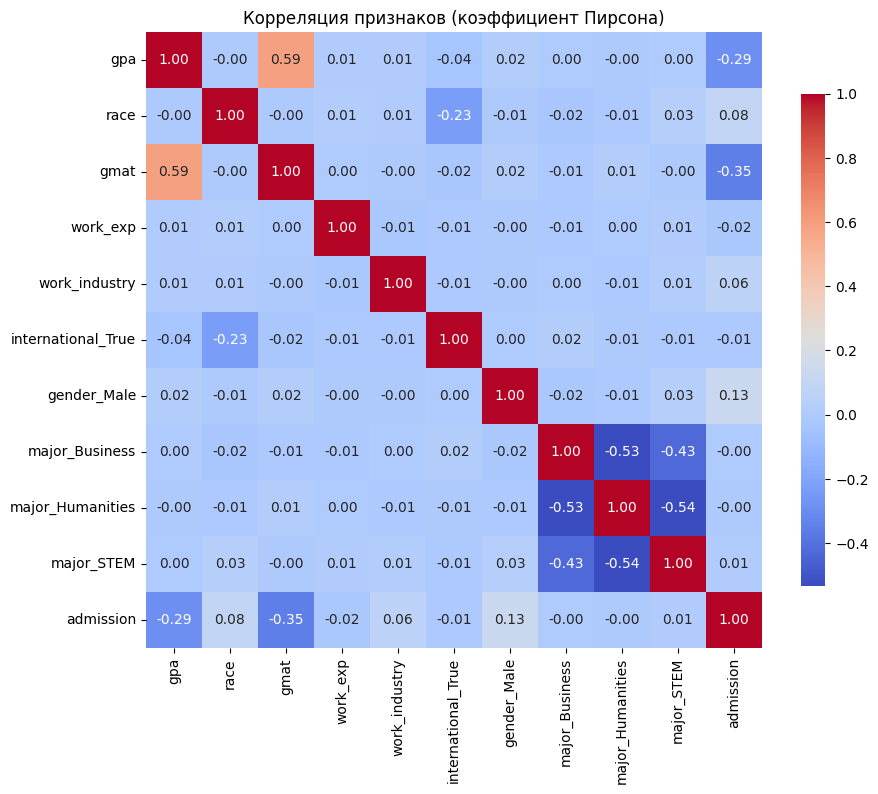

In [9]:
corr_df = X_encoded_train.copy(deep=True)
corr_df['admission'] = y
correlation_matrix = corr_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляция признаков (коэффициент Пирсона)')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print(tn, fp, fn, tp)
accuracy = (tp + tn) / (tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp)

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")

Accuracy: 0.8564397046759639
Precision: 0.8741379310344828
Recall: 0.9721955896452541
F1-Score: 0.920562868815252
Specificity: 0.17045454545454544


Accuracy: 0.8564397046759639
Precision: 0.8741379310344828
Recall: 0.9721955896452541
F1-Score: 0.920562868815252
Specificity: 0.17045454545454544


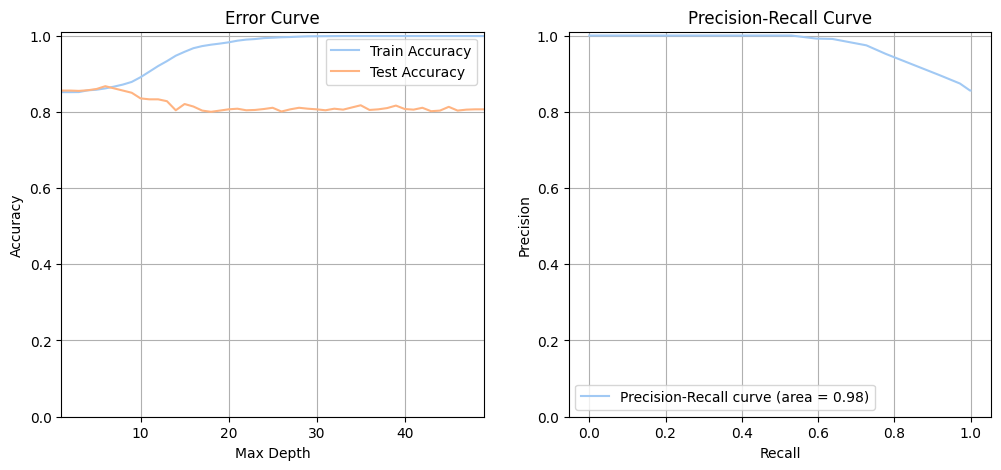

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve


model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")

# Построение кривой ошибок
depths = np.arange(1, 50)
train_accuracies = []
test_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.title('Error Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(depths[0], depths[-1])  # Ограничить ось X от 0 до 1
plt.ylim(0, 1.01)  # Ограничить ось Y от 0 до 1
plt.grid()

# Построение Precision-Recall Curve
precision_values, recall_values, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = auc(recall_values, precision_values)

plt.subplot(1, 2, 2)
plt.plot(recall_values, precision_values, label='Precision-Recall curve (area = {:.2f})'.format(average_precision))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1.01)
plt.show()


In [12]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
print(X.shape, y.shape)

(6094, 10) (6094,)


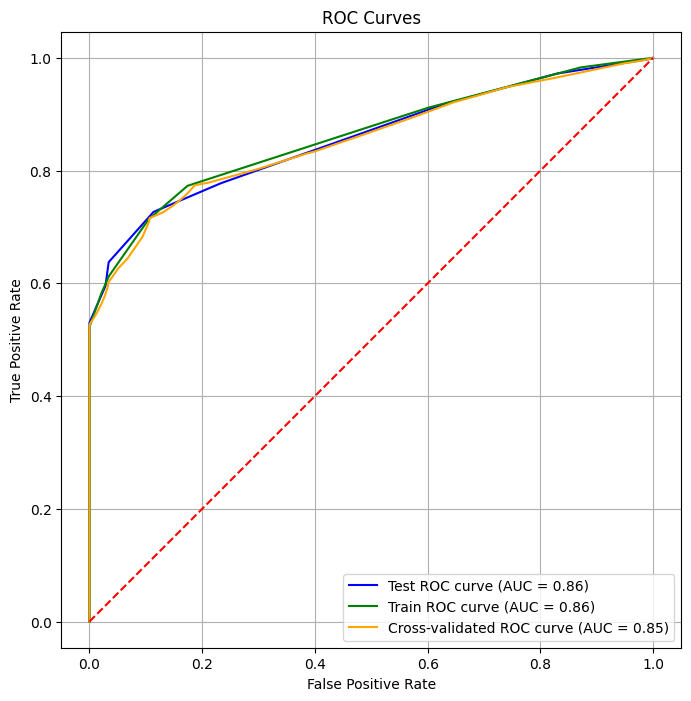

In [13]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)

# Предсказания вероятностей для тестовой выборки
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестовой выборки
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

y_pred_proba_train = model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

y_pred_proba_cv = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, _ = roc_curve(y, y_pred_proba_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, color='blue', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='green', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_cv, tpr_cv, color='orange', label=f'Cross-validated ROC curve (AUC = {roc_auc_cv:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.axis('equal')
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


# 1. Логистическая регрессия (log loss)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict_proba(X_test)[:, 1]
auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

# 2. AdaBoost
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)[:, 1]
auc_ada = roc_auc_score(y_test, y_pred_ada)

# 3. Градиентный бустинг (log loss)
grad_boost_logloss = GradientBoostingClassifier(loss='deviance', n_estimators=100)
grad_boost_logloss.fit(X_train, y_train)
y_pred_gb_logloss = grad_boost_logloss.predict_proba(X_test)[:, 1]
auc_gb_logloss = roc_auc_score(y_test, y_pred_gb_logloss)

# 4. Градиентный бустинг (exponential loss)
grad_boost_exponential = GradientBoostingClassifier(loss='exponential', n_estimators=100)
grad_boost_exponential.fit(X_train, y_train)
y_pred_gb_exponential = grad_boost_exponential.predict_proba(X_test)[:, 1]
auc_gb_exponential = roc_auc_score(y_test, y_pred_gb_exponential)

print(f'AUC Логистическая регрессия (log loss): {auc_log_reg:.4f}')
print(f'AUC AdaBoost: {auc_ada:.4f}')
print(f'AUC Градиентный бустинг (log loss): {auc_gb_logloss:.4f}')
print(f'AUC Градиентный бустинг (exponential loss): {auc_gb_exponential:.4f}')

AUC Логистическая регрессия (log loss): 0.8271
AUC AdaBoost: 0.8410
AUC Градиентный бустинг (log loss): 0.8638
AUC Градиентный бустинг (exponential loss): 0.8628


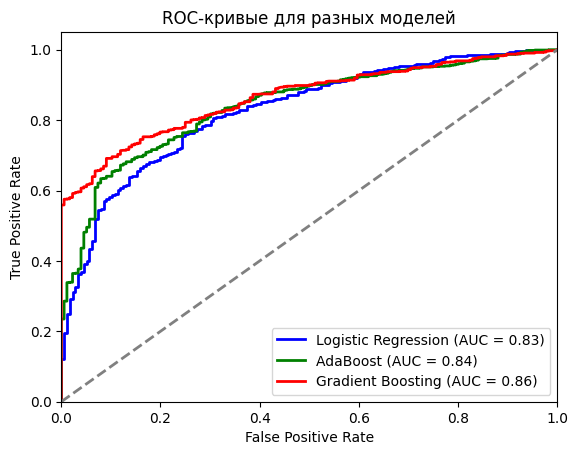

In [15]:
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_gb_logloss, tpr_gb_logloss, _ = roc_curve(y_test, y_pred_gb_logloss)
roc_auc_gb_logloss = auc(fpr_gb_logloss, tpr_gb_logloss)


plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_ada, tpr_ada, color='green', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_gb_logloss, tpr_gb_logloss, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb_logloss:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для разных моделей')
plt.legend(loc="lower right")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Определяем модель
tree = DecisionTreeClassifier(random_state=42)

# Параметры для поиска по сетке
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Обучение модели с поиском по сетке
grid_search.fit(X_train, y_train)

# Лучшие параметры
print(f'Лучшие параметры: {grid_search.best_params_}')

# Прогнозирование с лучшей моделью
best_tree = grid_search.best_estimator_
y_pred_best_tree = best_tree.predict_proba(X_test)[:, 1]

# Оценка модели с лучшими параметрами
auc_best_tree = roc_auc_score(y_test, y_pred_best_tree)
print(f'AUC лучшей модели дерева решений: {auc_best_tree:.4f}')


Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
AUC лучшей модели дерева решений: 0.8598
